In [1]:
import pandas as pd
import numpy as np

# Disable warnings
import warnings
warnings.filterwarnings("ignore")

# Import plotting modules
import seaborn as sns
sns.set()
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker
%matplotlib inline

In [2]:
df = pd.read_csv('C:/Users/gadee/Downloads/data.csv')

In [3]:
df.head()

,layer_height,wall_thickness,infill_density,infill_pattern,nozzle_temperature,bed_temperature,print_speed,material,fan_speed,roughness,tension_strenght,elongation
0,0.02,8,90,grid,220,60,40,abs,0,25,18,1.2
1,0.02,7,90,honeycomb,225,65,40,abs,25,32,16,1.4
2,0.02,1,80,grid,230,70,40,abs,50,40,8,0.8
3,0.02,4,70,honeycomb,240,75,40,abs,75,68,10,0.5
4,0.02,6,90,grid,250,80,40,abs,100,92,5,0.7


In [4]:
def create_df(dic, feature_list):
    out = pd.DataFrame(dic)
    out = pd.concat([out, pd.get_dummies(out[feature_list])], axis = 1)
    out.drop(feature_list, axis = 1, inplace = True)
    return out

In [5]:
features = ['infill_pattern', 'material']

In [6]:
df_test = create_df(df, features)

In [7]:
df_test.head()

,layer_height,wall_thickness,infill_density,nozzle_temperature,bed_temperature,print_speed,fan_speed,roughness,tension_strenght,elongation,infill_pattern_grid,infill_pattern_honeycomb,material_abs,material_pla
0,0.02,8,90,220,60,40,0,25,18,1.2,1,0,1,0
1,0.02,7,90,225,65,40,25,32,16,1.4,0,1,1,0
2,0.02,1,80,230,70,40,50,40,8,0.8,1,0,1,0
3,0.02,4,70,240,75,40,75,68,10,0.5,0,1,1,0
4,0.02,6,90,250,80,40,100,92,5,0.7,1,0,1,0


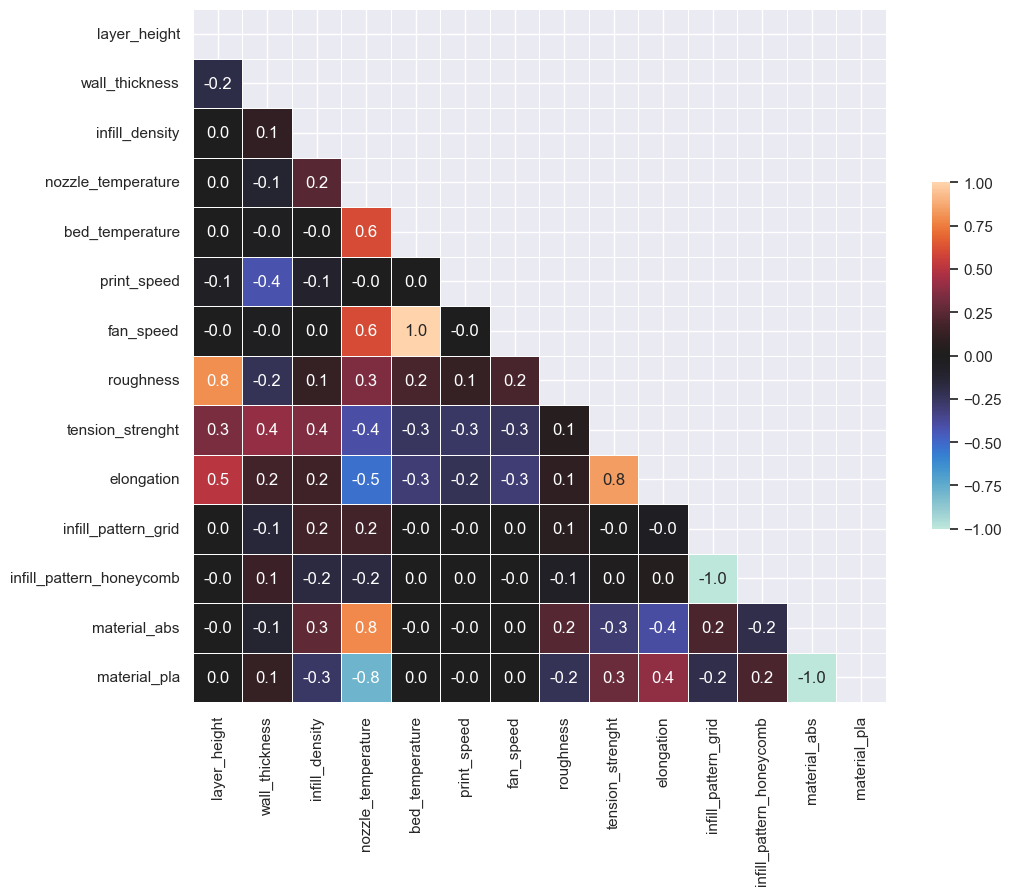

In [14]:
df = df_test.copy()

corr = df.corr(method='pearson')

# Create a mask to hide the upper triangle of the correlation matrix (which is symmetric)
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(12, 9))

sns.heatmap(corr, mask=mask, vmax=1, center=0, annot=True, fmt='.1f', square=True, linewidths=.5, cbar_kws={"shrink": .5});